# Projeto Modelo de Investimento - Trend Following

- Projeto desenvolvido com objetivos meramente didáticos, para prática das tecnologias abordadas. Este projeto consiste em analisar um plano de investimento em ações que segue o método de trend following, baseado em comprar ações com tendência de alta e vender ações com tendência de queda.

- A estratégia do projeto consiste em todo mês compor uma carteira de investimentos com as 10 ações mais rentáveis do ibovespa nos últimos 6 meses. Todo mês a verificação dessa rentabilidade é realizada e a carteira é atualizada. Taxas que envolvem operações com ações não serão consideradas no cálculo da rentabilidade.

- Para realizar a análise dessa estrátegia, pegaremos o histórico de cotações de todas as ações que compuseram o ibovespa de dezembro de 2015 até agosto de 2022. Com essas cotações, calcularemos mês a mês como seria a rentabilidade dessa estratégia com relação ao índice ibovespa no mesmo período.

- Para isso, temos um banco de dados organizado mês a mês de dezembro de 2015 até agosto de 2022 com os tickers das ações que compuseram o ibovespa naquele mês, que será utilizado para obtermos as cotações.

### Bibliotecas Necessárias

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import plotly.express as px
import seaborn as sns

### Composição Ibovespa dez/2015 - ago/2022

In [118]:
# Importando as ações que compuseram o índice Ibovespa de dezembro de 2015 até agosto de 2022
df_acoes_ibov = pd.read_excel('composicao_ibov.xlsx')
lista_acoes = []

# Tratando os dados para adequá-los ao formato de pesquisa aceito pelo yahoo finance
for data in df_acoes_ibov:
    aux = df_acoes_ibov[data].dropna()
    aux = aux + '.SA'
    lista_acoes.append(aux)

# Salvando um dataframe com a lista de ações já tradadas
lista_acoes_final = pd.concat(lista_acoes)
lista_acoes_final = lista_acoes_final.drop_duplicates()
ibov = pd.Series(['^BVSP'])
display(lista_acoes_final)
display(ibov)

0      ABEV3.SA
1      AMER3.SA
2      AURE3.SA
3      B3SA3.SA
5      BBAS3.SA
        ...    
83    IGTI11.SA
57     CMIN3.SA
60     RRRP3.SA
91     POSI3.SA
64     SLCE3.SA
Length: 104, dtype: object

0    ^BVSP
dtype: object

### Histórico das cotações das ações da lista e do índice Ibovespa de 30/06/2015 até 31/08/2022

In [119]:
# O período de interesse para a análise da estratégia da carteira é de janeiro de 2015 até agosto de 2022.
# Porém, para definir a carteira de cada mês precisamos calcular o rendimento das ações nos últimos 6 meses.
# Logo, precisamos obter os dados dos rendimentos a partir de junho de 2015 para definirmos as primeiras carteiras do ano de 2015.    

cotacao_acoes = web.DataReader(lista_acoes_final, data_source='yahoo', start='2015-06-30', end='2022-08-31')['Adj Close']
display(cotacao_acoes)
cotacao_ibovespa = web.DataReader(ibov, data_source='yahoo', start='2015-12-30', end='2022-08-31')['Adj Close']
display(cotacao_ibovespa)

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'HGTX3.SA', replacing with NaN.

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'JPSA3.SA', replacing with NaN.

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'LCAM3.SA', replacing with NaN.

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'BIDI11.SA', replacing with NaN.

C:\Users\Felipe\Anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'BIDI4.SA', replacing with NaN.



Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441730,19.304613,NaN,2.934543,16.309504,9.631701,9.540175,19.669220,5.087124,63.513847,...,NaN,NaN,NaN,1.771179,4.797363,NaN,NaN,NaN,NaN,NaN
2015-07-01,15.555575,18.623274,NaN,2.914425,16.101274,9.569741,9.509977,19.813761,4.976008,62.158150,...,NaN,NaN,NaN,1.832254,4.911059,NaN,NaN,NaN,NaN,NaN
2015-07-02,15.482392,18.831461,NaN,2.904368,16.054249,9.575685,9.704394,19.912050,4.961515,63.687504,...,NaN,NaN,NaN,1.806079,4.797363,NaN,NaN,NaN,NaN,NaN
2015-07-03,15.571835,18.594885,NaN,2.876706,15.899761,9.603234,9.593581,19.634531,4.860064,63.804405,...,NaN,NaN,NaN,1.779904,4.822322,NaN,NaN,NaN,NaN,NaN
2015-07-06,15.628757,19.683134,NaN,2.901853,16.020668,9.417233,9.405538,19.617188,4.806922,63.931034,...,NaN,NaN,NaN,1.771179,4.838960,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,15.820000,18.790001,14.10,12.691257,41.522144,16.136370,19.473202,28.150000,23.510000,16.469999,...,20.920000,3.92,36.950001,11.470000,47.889999,NaN,NaN,NaN,NaN,NaN
2022-08-26,15.670000,18.100000,14.11,12.353354,41.313538,16.056538,19.403336,28.400000,23.090000,16.530001,...,20.270000,3.84,37.080002,11.370000,48.349998,NaN,NaN,NaN,NaN,NaN
2022-08-29,15.610000,17.510000,14.19,12.263908,42.167824,16.106432,19.473202,28.219999,22.870001,16.370001,...,20.129999,3.79,37.799999,11.570000,48.509998,NaN,NaN,NaN,NaN,NaN


Symbols,^BVSP
Date,
2015-12-30,43350.0
2016-01-04,42141.0
2016-01-05,42419.0
2016-01-06,41773.0
2016-01-07,40695.0
...,...
2022-08-25,113532.0
2022-08-26,112299.0
2022-08-29,112323.0


### Pegando a cotação do fechamento mensal de cada ação e do índice Ibovespa

In [120]:
cotacao_acoes_mensal = cotacao_acoes.resample("M").last()
cotacao_ibov_mensal = cotacao_ibovespa.resample("M").last()
display(cotacao_acoes_mensal)
display(cotacao_ibov_mensal)

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441730,19.304613,NaN,2.934543,16.309504,9.631701,9.540175,19.669220,5.087124,63.513847,...,NaN,NaN,NaN,1.771179,4.797363,NaN,NaN,NaN,NaN,NaN
2015-07-31,15.832043,17.118650,NaN,2.630275,14.811555,9.527460,9.227568,18.622736,4.748948,70.009506,...,NaN,NaN,NaN,1.745004,4.880556,NaN,NaN,NaN,NaN,NaN
2015-08-31,15.523046,14.762350,NaN,2.748285,12.068585,8.675241,7.745596,17.079348,4.526719,67.720337,...,NaN,NaN,NaN,1.657754,4.461826,NaN,NaN,NaN,NaN,NaN
2015-09-30,15.913111,14.062085,NaN,2.824768,10.458092,8.146770,7.203962,14.764407,3.961483,68.762634,...,NaN,NaN,NaN,1.308753,4.963747,NaN,NaN,NaN,NaN,NaN
2015-10-31,15.642698,13.797121,NaN,2.906349,10.987876,8.090501,7.068889,15.829639,3.985638,58.544193,...,NaN,NaN,NaN,1.308753,4.775180,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,24.000000,14.572941,13.064609,32.461613,14.642206,17.685907,24.558174,27.713346,13.580000,...,20.648689,4.740562,46.230000,7.129518,50.483852,NaN,NaN,NaN,NaN,NaN
2022-05-31,14.190000,20.100000,13.960000,12.543989,35.928734,16.596193,20.186001,25.958462,28.580000,15.650000,...,19.840000,4.830000,48.750000,7.500000,54.849998,NaN,NaN,NaN,NaN,NaN
2022-06-30,13.400000,13.430000,13.620000,10.892418,32.994507,14.315794,17.130054,25.070002,25.240000,13.590000,...,17.990000,3.860000,35.150002,5.550000,44.130001,NaN,NaN,NaN,NaN,NaN


Symbols,^BVSP
Date,
2015-12-31,43350.0
2016-01-31,40406.0
2016-02-29,42794.0
2016-03-31,50055.0
2016-04-30,53911.0
...,...
2022-04-30,107876.0
2022-05-31,111351.0
2022-06-30,98542.0


### Tratamento dos dados e cálculos de rendimento

In [121]:
# preenchendo os valores NaN com 0 para realizar os cálculos do rendimento
cotacao_acoes_mensal = cotacao_acoes_mensal.fillna(0)
display(cotacao_acoes_mensal)

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,15.441730,19.304613,0.000000,2.934543,16.309504,9.631701,9.540175,19.669220,5.087124,63.513847,...,0.000000,0.000000,0.000000,1.771179,4.797363,0.0,0.0,0.0,0.0,0.0
2015-07-31,15.832043,17.118650,0.000000,2.630275,14.811555,9.527460,9.227568,18.622736,4.748948,70.009506,...,0.000000,0.000000,0.000000,1.745004,4.880556,0.0,0.0,0.0,0.0,0.0
2015-08-31,15.523046,14.762350,0.000000,2.748285,12.068585,8.675241,7.745596,17.079348,4.526719,67.720337,...,0.000000,0.000000,0.000000,1.657754,4.461826,0.0,0.0,0.0,0.0,0.0
2015-09-30,15.913111,14.062085,0.000000,2.824768,10.458092,8.146770,7.203962,14.764407,3.961483,68.762634,...,0.000000,0.000000,0.000000,1.308753,4.963747,0.0,0.0,0.0,0.0,0.0
2015-10-31,15.642698,13.797121,0.000000,2.906349,10.987876,8.090501,7.068889,15.829639,3.985638,58.544193,...,0.000000,0.000000,0.000000,1.308753,4.775180,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,14.520000,24.000000,14.572941,13.064609,32.461613,14.642206,17.685907,24.558174,27.713346,13.580000,...,20.648689,4.740562,46.230000,7.129518,50.483852,0.0,0.0,0.0,0.0,0.0
2022-05-31,14.190000,20.100000,13.960000,12.543989,35.928734,16.596193,20.186001,25.958462,28.580000,15.650000,...,19.840000,4.830000,48.750000,7.500000,54.849998,0.0,0.0,0.0,0.0,0.0
2022-06-30,13.400000,13.430000,13.620000,10.892418,32.994507,14.315794,17.130054,25.070002,25.240000,13.590000,...,17.990000,3.860000,35.150002,5.550000,44.130001,0.0,0.0,0.0,0.0,0.0


In [122]:
# calculando o retorno mensal das ações e do indice Ibovespa
df_retorno_mensal_acoes = cotacao_acoes_mensal.pct_change().replace([np.inf, -np.inf, -1], 0)
display(df_retorno_mensal_acoes)
df_retorno_mensal_ibov = cotacao_ibov_mensal.pct_change().replace([np.inf, -np.inf, -1], 0)
display(df_retorno_mensal_ibov)

# calculando o retorno das ações a cada 6 meses
df_retorno_acoes_6m = cotacao_acoes_mensal.pct_change(periods=6).replace([np.inf, -np.inf, -1], 0)
display(df_retorno_acoes_6m)

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,0.025277,-0.113235,NaN,-0.103685,-0.091845,-0.010823,-0.032768,-0.053204,-0.066477,0.102272,...,NaN,NaN,NaN,-0.014778,0.017341,NaN,NaN,NaN,NaN,NaN
2015-08-31,-0.019517,-0.137645,NaN,0.044866,-0.185191,-0.089449,-0.160603,-0.082877,-0.046795,-0.032698,...,NaN,NaN,NaN,-0.050000,-0.085796,NaN,NaN,NaN,NaN,NaN
2015-09-30,0.025128,-0.047436,NaN,0.027829,-0.133445,-0.060917,-0.069928,-0.135540,-0.124867,0.015391,...,NaN,NaN,NaN,-0.210526,0.112492,NaN,NaN,NaN,NaN,NaN
2015-10-31,-0.016993,-0.018842,NaN,0.028881,0.050658,-0.006907,-0.018750,0.072149,0.006097,-0.148605,...,NaN,NaN,NaN,0.000000,-0.037989,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.057143,-0.264931,-0.083177,-0.153405,-0.042651,-0.100500,-0.108279,-0.005086,-0.114571,-0.269500,...,0.026406,-0.137645,0.104660,-0.155676,0.062450,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.022727,-0.162500,-0.042060,-0.039850,0.106807,0.133449,0.141361,0.057019,0.031272,0.152430,...,-0.039164,0.018867,0.054510,0.051965,0.086486,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.055673,-0.331841,-0.024355,-0.131662,-0.081668,-0.137405,-0.151389,-0.034226,-0.116865,-0.131629,...,-0.093246,-0.200828,-0.278974,-0.260000,-0.195442,NaN,NaN,NaN,NaN,NaN


Symbols,^BVSP
Date,
2015-12-31,NaN
2016-01-31,-0.067912
2016-02-29,0.059100
2016-03-31,0.169673
2016-04-30,0.077035
...,...
2022-04-30,-0.101026
2022-05-31,0.032213
2022-06-30,-0.115033


Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.112027,-0.175688,0.0,0.150028,0.224242,-0.015595,0.012688,0.196896,-0.239895,-0.415411,...,0.000000,-0.000168,0.429499,-0.073547,0.335498,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.081956,-0.323756,0.0,0.183710,0.196423,0.113366,0.154198,0.338458,-0.233300,-0.207595,...,0.069464,-0.100750,0.765025,-0.103074,0.647592,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.130999,-0.566189,0.0,0.012196,0.206000,-0.004612,0.001755,0.300746,0.067465,-0.396536,...,0.002047,-0.371796,0.047690,-0.442227,0.129822,NaN,NaN,NaN,NaN,NaN


In [123]:
# Após a realização dos cálculos necessários, filtraremos o período temporal de análise das carteiras
df_retorno_mensal_acoes = df_retorno_mensal_acoes.loc['2015-12-31':]
df_retorno_acoes_6m = df_retorno_acoes_6m.loc['2015-12-31':]
display(df_retorno_mensal_acoes)
display(df_retorno_acoes_6m)
display(df_retorno_mensal_ibov)

Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.034335,0.031843,NaN,-0.021629,-0.080856,-0.111959,-0.047918,-0.063150,-0.062030,0.006541,...,NaN,NaN,NaN,0.000000,-0.045270,NaN,NaN,NaN,NaN,NaN
2016-01-31,0.045378,-0.129350,NaN,-0.057852,-0.060380,-0.043574,-0.057669,-0.049322,-0.334669,-0.118864,...,NaN,NaN,NaN,-0.223529,-0.005471,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.048030,-0.128959,NaN,0.132554,-0.022383,0.188885,0.176957,0.078914,0.213855,0.065727,...,NaN,NaN,NaN,0.045454,0.124694,NaN,NaN,NaN,NaN,NaN
2016-03-31,0.065760,0.229437,NaN,0.320998,0.475473,0.293589,0.269139,0.232172,0.526055,0.000407,...,NaN,NaN,NaN,0.072464,-0.141304,NaN,NaN,NaN,NaN,NaN
2016-04-30,0.031383,-0.035211,NaN,0.119218,0.118362,0.027804,0.053570,0.009421,0.377236,-0.041123,...,NaN,NaN,NaN,-0.013514,-0.017721,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.057143,-0.264931,-0.083177,-0.153405,-0.042651,-0.100500,-0.108279,-0.005086,-0.114571,-0.269500,...,0.026406,-0.137645,0.104660,-0.155676,0.062450,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.022727,-0.162500,-0.042060,-0.039850,0.106807,0.133449,0.141361,0.057019,0.031272,0.152430,...,-0.039164,0.018867,0.054510,0.051965,0.086486,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.055673,-0.331841,-0.024355,-0.131662,-0.081668,-0.137405,-0.151389,-0.034226,-0.116865,-0.131629,...,-0.093246,-0.200828,-0.278974,-0.260000,-0.195442,NaN,NaN,NaN,NaN,NaN


Symbols,ABEV3.SA,AMER3.SA,AURE3.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRAP4.SA,BRFS3.SA,...,IGTI11.SA,CMIN3.SA,RRRP3.SA,POSI3.SA,SLCE3.SA,HGTX3.SA,JPSA3.SA,LCAM3.SA,BIDI11.SA,BIDI4.SA
Date,,,,,,,,,,,,,,,,,,,,,
2015-12-31,-0.044826,-0.253431,NaN,-0.019676,-0.362491,-0.235068,-0.289905,-0.263887,-0.501426,-0.150329,...,NaN,NaN,NaN,-0.162562,-0.049133,NaN,NaN,NaN,NaN,NaN
2016-01-31,-0.026099,-0.266998,NaN,0.030453,-0.340404,-0.260394,-0.308186,-0.260869,-0.644662,-0.320789,...,NaN,NaN,NaN,-0.340000,-0.070455,NaN,NaN,NaN,NaN,NaN
2016-02-29,-0.054421,-0.259615,NaN,0.116931,-0.208609,-0.034315,-0.029976,-0.130478,-0.547496,-0.251678,...,NaN,NaN,NaN,-0.273684,0.143567,NaN,NaN,NaN,NaN,NaN
2016-03-31,-0.016942,-0.044415,NaN,0.435515,0.347493,0.330233,0.323656,0.239388,-0.210925,-0.262721,...,NaN,NaN,NaN,-0.013333,-0.117318,NaN,NaN,NaN,NaN,NaN
2016-04-30,0.031437,-0.060357,NaN,0.561556,0.434325,0.376728,0.421211,0.166876,0.080156,-0.169646,...,NaN,NaN,NaN,-0.026667,-0.098722,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-30,-0.112027,-0.175688,0.0,0.150028,0.224242,-0.015595,0.012688,0.196896,-0.239895,-0.415411,...,0.000000,-0.000168,0.429499,-0.073547,0.335498,NaN,NaN,NaN,NaN,NaN
2022-05-31,-0.081956,-0.323756,0.0,0.183710,0.196423,0.113366,0.154198,0.338458,-0.233300,-0.207595,...,0.069464,-0.100750,0.765025,-0.103074,0.647592,NaN,NaN,NaN,NaN,NaN
2022-06-30,-0.130999,-0.566189,0.0,0.012196,0.206000,-0.004612,0.001755,0.300746,0.067465,-0.396536,...,0.002047,-0.371796,0.047690,-0.442227,0.129822,NaN,NaN,NaN,NaN,NaN


Symbols,^BVSP
Date,
2015-12-31,NaN
2016-01-31,-0.067912
2016-02-29,0.059100
2016-03-31,0.169673
2016-04-30,0.077035
...,...
2022-04-30,-0.101026
2022-05-31,0.032213
2022-06-30,-0.115033


In [124]:
# Melhorando a estrutura dos dataframes - Ao invés de termos uma coluna para cada ação, teremos
# uma coluna contendo todas as ações
cotacao_acoes_mensal.reset_index(inplace=True)
df_retorno_mensal_acoes.reset_index(inplace=True)
df_retorno_acoes_6m.reset_index(inplace=True)
df_retorno_mensal_ibov.reset_index(inplace=True)

cotacao_acoes_mensal = pd.melt(cotacao_acoes_mensal, id_vars= "Date", var_name= "cod", value_name= "cotacao").dropna()
df_retorno_mensal_acoes = pd.melt(df_retorno_mensal_acoes, id_vars= "Date", var_name= "cod", value_name= "retorno_mensal").dropna()
df_retorno_acoes_6m = pd.melt(df_retorno_acoes_6m, id_vars= "Date", var_name= "cod", value_name= "retorno_6m").dropna()                 
df_retorno_mensal_ibov = pd.melt(df_retorno_mensal_ibov, id_vars= "Date", var_name= "cod", value_name= "retorno_mensal").dropna()                 

display(cotacao_acoes_mensal)
display(df_retorno_mensal_acoes)
display(df_retorno_acoes_6m)
display(df_retorno_mensal_ibov)

,Date,cod,cotacao
0,2015-06-30,ABEV3.SA,15.441730
1,2015-07-31,ABEV3.SA,15.832043
2,2015-08-31,ABEV3.SA,15.523046
3,2015-09-30,ABEV3.SA,15.913111
4,2015-10-31,ABEV3.SA,15.642698
...,...,...,...
9043,2022-04-30,BIDI4.SA,0.000000
9044,2022-05-31,BIDI4.SA,0.000000
9045,2022-06-30,BIDI4.SA,0.000000
9046,2022-07-31,BIDI4.SA,0.000000


,Date,cod,retorno_mensal
0,2015-12-31,ABEV3.SA,-0.034335
1,2016-01-31,ABEV3.SA,0.045378
2,2016-02-29,ABEV3.SA,-0.048030
3,2016-03-31,ABEV3.SA,0.065760
4,2016-04-30,ABEV3.SA,0.031383
...,...,...,...
8014,2022-04-30,SLCE3.SA,0.062450
8015,2022-05-31,SLCE3.SA,0.086486
8016,2022-06-30,SLCE3.SA,-0.195442
8017,2022-07-31,SLCE3.SA,-0.000680


,Date,cod,retorno_6m
0,2015-12-31,ABEV3.SA,-0.044826
1,2016-01-31,ABEV3.SA,-0.026099
2,2016-02-29,ABEV3.SA,-0.054421
3,2016-03-31,ABEV3.SA,-0.016942
4,2016-04-30,ABEV3.SA,0.031437
...,...,...,...
8014,2022-04-30,SLCE3.SA,0.335498
8015,2022-05-31,SLCE3.SA,0.647592
8016,2022-06-30,SLCE3.SA,0.129822
8017,2022-07-31,SLCE3.SA,0.005206


,Date,cod,retorno_mensal
1,2016-01-31,^BVSP,-0.067912
2,2016-02-29,^BVSP,0.059100
3,2016-03-31,^BVSP,0.169673
4,2016-04-30,^BVSP,0.077035
5,2016-05-31,^BVSP,-0.100889
...,...,...,...
76,2022-04-30,^BVSP,-0.101026
77,2022-05-31,^BVSP,0.032213
78,2022-06-30,^BVSP,-0.115033
79,2022-07-31,^BVSP,0.046914


### Definindo a carteira mês a mês e calculando os resultados da estratégias

In [125]:
# Definindo a carteira mês a mês

dic_meses = {12:'jan', 1:'fev', 2:'mar', 3:'abr', 4:'mai', 5:'jun', 6:'jul', 7:'ago', 8:'set', 9:'out', 10:'nov', 11:'dez'}
dic_carteira = {}
aux_mes = []
aux_rc = []
aux_ri = []
intervalo_datas_carteira = df_retorno_acoes_6m['Date'].drop_duplicates()

for i, mes in enumerate(intervalo_datas_carteira):
    # Definindo as carteiras mês a mês - As 10 ações de maior rendimento nos últimos 6 meses
    composicao_ibov_mes = list(df_acoes_ibov[mes].dropna())
    composicao_ibov_mes = [cod + '.SA' for cod in composicao_ibov_mes]
    #print(composicao_ibov_mes)
    df_retornos_6m_aux = df_retorno_acoes_6m.loc[
        (df_retorno_acoes_6m['Date'] == mes) &
        (df_retorno_acoes_6m['cod'].isin(composicao_ibov_mes))
    ]
    df_retornos_6m_aux = df_retornos_6m_aux.sort_values('retorno_6m', ascending=False).head(10)
    carteira = list(df_retornos_6m_aux['cod'])
    
    try:
        # Calculando o rendimento mensal das carteiras e comparando com o ibovespa
        
        # Filtrando o fechamento mensal das ações
        retorno_carteira = cotacao_acoes_mensal.loc[
            (cotacao_acoes_mensal['Date'] == intervalo_datas_carteira[i+1]) & 
            (cotacao_acoes_mensal['cod'].isin(carteira))
        ].copy()         
        
        # Filtrando a cotação do início do mês das ações
        df_aux = cotacao_acoes_mensal.loc[
            (cotacao_acoes_mensal['Date'] == mes) & 
            (cotacao_acoes_mensal['cod'].isin(carteira))
        ].copy()
        
        # Adicionando a cotação das ações do início do respectivo mês ao dataframe de retorno da carteira
        retorno_carteira['cotacao_inicial'] = list(df_aux['cotacao'])


        retorno_carteira = retorno_carteira.rename(columns = {'Date':'Mes', 'cod': 'Codigo', 'cotacao':'cotacao_final', 'cotacao_inicial':'cotacao_inicial'})
        
        # Cálculo do retorno mês a mês
        retorno_carteira['valorizacao'] = retorno_carteira['cotacao_final'] - retorno_carteira['cotacao_inicial']
        retorno_carteira['valorizacao_%'] = list(df_retorno_mensal_acoes['retorno_mensal'].loc[
            (df_retorno_mensal_acoes['cod'].isin(carteira)) & 
            (df_retorno_mensal_acoes['Date'] == intervalo_datas_carteira[i+1])
        ])

        # Filtrando o retorno do indice Ibovespa do mês
        retorno_ibov = df_retorno_mensal_ibov[(df_retorno_mensal_ibov['Date'] == intervalo_datas_carteira[i+1])]
        # display(retorno_ibov)
        
        # Considerando peso de investimento igual em todas as ações, o retorno da carteira será a média simples dos rendimentos de todas as ações da carteira
        rc = np.mean(retorno_carteira['valorizacao_%'])
        # Retorno do Ibovespa
        ri = retorno_ibov.iloc[0,-1]

        if mes.month == 12:
            aux_mes.append(f'{dic_meses[mes.month]}/{mes.year + 1}')
            aux_rc.append(rc)
            aux_ri.append(ri)     
        else:
            aux_mes.append(f'{dic_meses[mes.month]}/{mes.year}')
            aux_rc.append(rc)
            aux_ri.append(ri)
    except:
        pass
    
    #display(retorno_carteira)
dic_carteira['mes'] = aux_mes
dic_carteira['retorno_carteira'] = aux_rc
dic_carteira['retorno_ibovespa'] = aux_ri
#display(dic_carteira)
#display(retorno_carteira)

In [126]:
# Dataframe com o rendimento mês a mês da carteira e do índice ibovespa
resultado = pd.DataFrame(data=dic_carteira)
resultado.set_index('mes', inplace=True)
display(
    
    resultado.style.format({
    'retorno_carteira': '{:,.2%}'.format,
    'retorno_ibovespa': '{:,.2%}'.format
})
    
)

# Dataframe com o rendimento ano a ano da carteira e do índice ibovespa
lista_meses = list(resultado.index)
lista_anos = [data[4:8] for data in lista_meses]

resultado_anual = resultado.copy()
resultado_anual['retorno_carteira'] = resultado_anual['retorno_carteira'] + 1 
resultado_anual['retorno_ibovespa'] = resultado_anual['retorno_ibovespa'] + 1
resultado_anual['ano'] = lista_anos
#display(resultado_anual)
resultado_anual['retorno_carteira_anual'] = resultado_anual.groupby('ano')['retorno_carteira'].cumprod() - 1
resultado_anual['retorno_ibovespa_anual'] = resultado_anual.groupby('ano')['retorno_ibovespa'].cumprod() - 1
resultado_anual = resultado_anual.groupby('ano').tail(1)[['ano','retorno_carteira_anual','retorno_ibovespa_anual']]
resultado_anual.set_index('ano', inplace=True)
display(
    
    resultado_anual.style.format({
    'retorno_carteira_anual': '{:,.2%}'.format,
    'retorno_ibovespa_anual': '{:,.2%}'.format
})
    
)

# Dataframe com o rendimento ano a ano cumulativo da carteira e do índice ibovespa
lista_meses = list(resultado.index)
lista_anos = [data[4:8] for data in lista_meses]

resultado_anual_cumulativo = resultado.copy()
resultado_anual_cumulativo['retorno_carteira'] = resultado_anual_cumulativo['retorno_carteira'] + 1 
resultado_anual_cumulativo['retorno_ibovespa'] = resultado_anual_cumulativo['retorno_ibovespa'] + 1
resultado_anual_cumulativo['ano'] = lista_anos
#display(resultado_anual)
resultado_anual_cumulativo['retorno_carteira_cumulativo'] = resultado_anual_cumulativo['retorno_carteira'].cumprod() - 1
resultado_anual_cumulativo['retorno_ibovespa_cumulativo'] = resultado_anual_cumulativo['retorno_ibovespa'].cumprod() - 1
resultado_anual_cumulativo = resultado_anual_cumulativo.groupby('ano').tail(1)[['ano','retorno_carteira_cumulativo','retorno_ibovespa_cumulativo']]

resultado_anual_cumulativo.set_index('ano', inplace=True)
display(
    
    resultado_anual_cumulativo.style.format({
    'retorno_carteira_cumulativo': '{:,.2%}'.format,
    'retorno_ibovespa_cumulativo': '{:,.2%}'.format
})
    
)

,retorno_carteira,retorno_ibovespa
mes,,
jan/2016,-4.32%,-6.79%
fev/2016,7.69%,5.91%
mar/2016,9.13%,16.97%
abr/2016,16.51%,7.70%
mai/2016,-16.48%,-10.09%
jun/2016,7.75%,6.30%
jul/2016,11.46%,11.22%
ago/2016,6.64%,1.03%
set/2016,-2.72%,0.80%


,retorno_carteira_anual,retorno_ibovespa_anual
ano,,
2016,42.23%,38.93%
2017,36.72%,26.86%
2018,21.20%,15.03%
2019,66.66%,31.95%
2020,36.82%,2.88%
2021,10.99%,-12.14%
2022,17.48%,4.48%


,retorno_carteira_cumulativo,retorno_ibovespa_cumulativo
ano,,
2016,42.23%,38.93%
2017,94.47%,76.24%
2018,135.68%,102.74%
2019,292.78%,167.51%
2020,437.40%,175.22%
2021,496.47%,141.80%
2022,600.73%,152.65%


### Gráficos

[Text(0.5, 69.7222222222222, ''), Text(170.72222222222223, 0.5, '')]

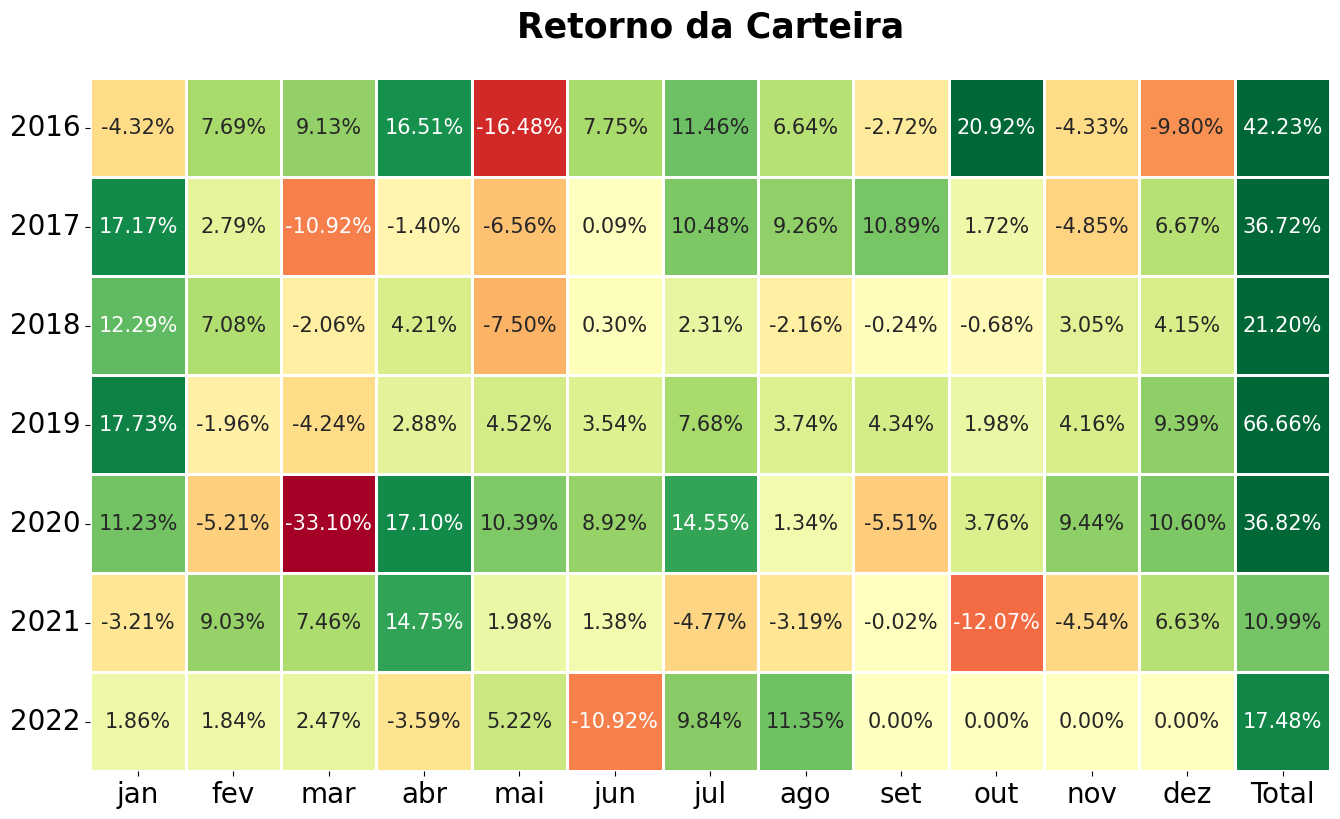

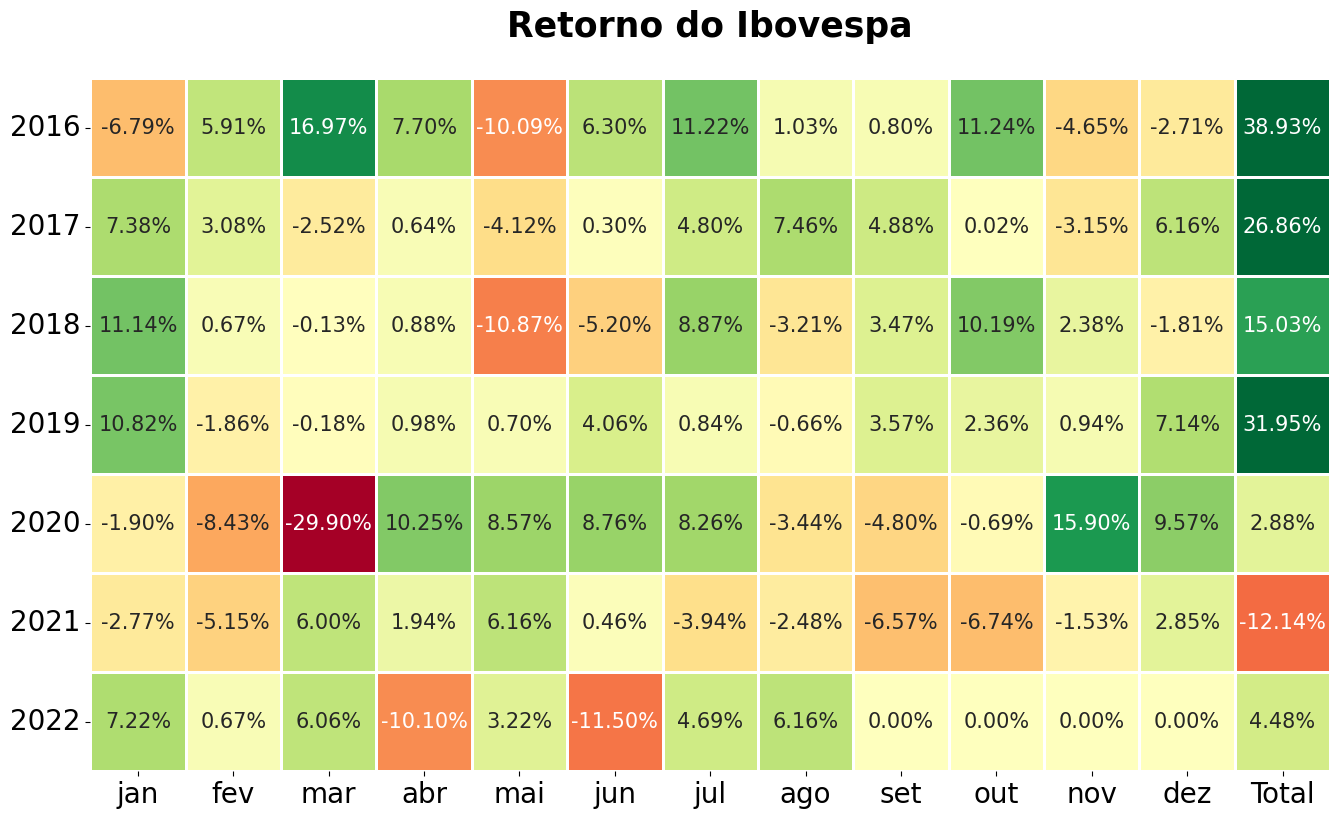

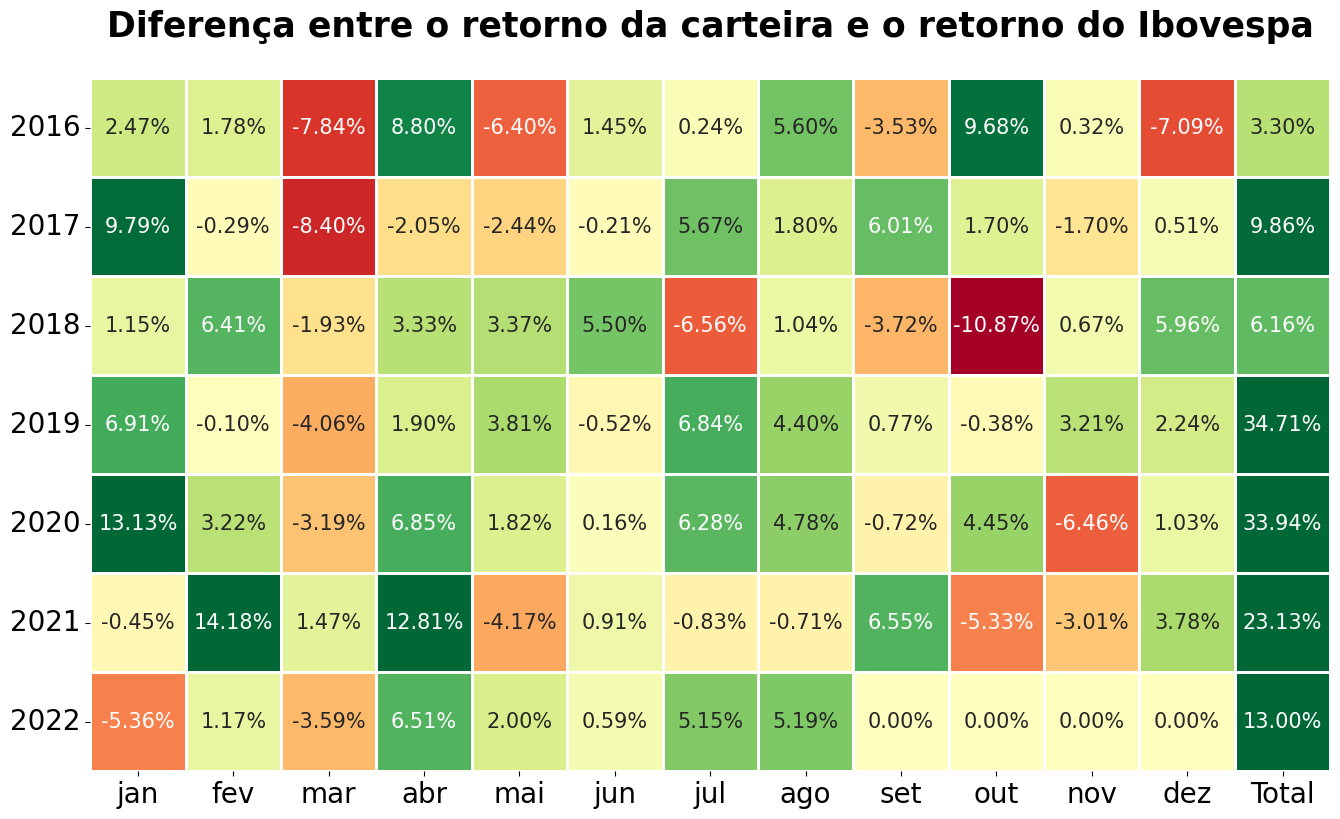

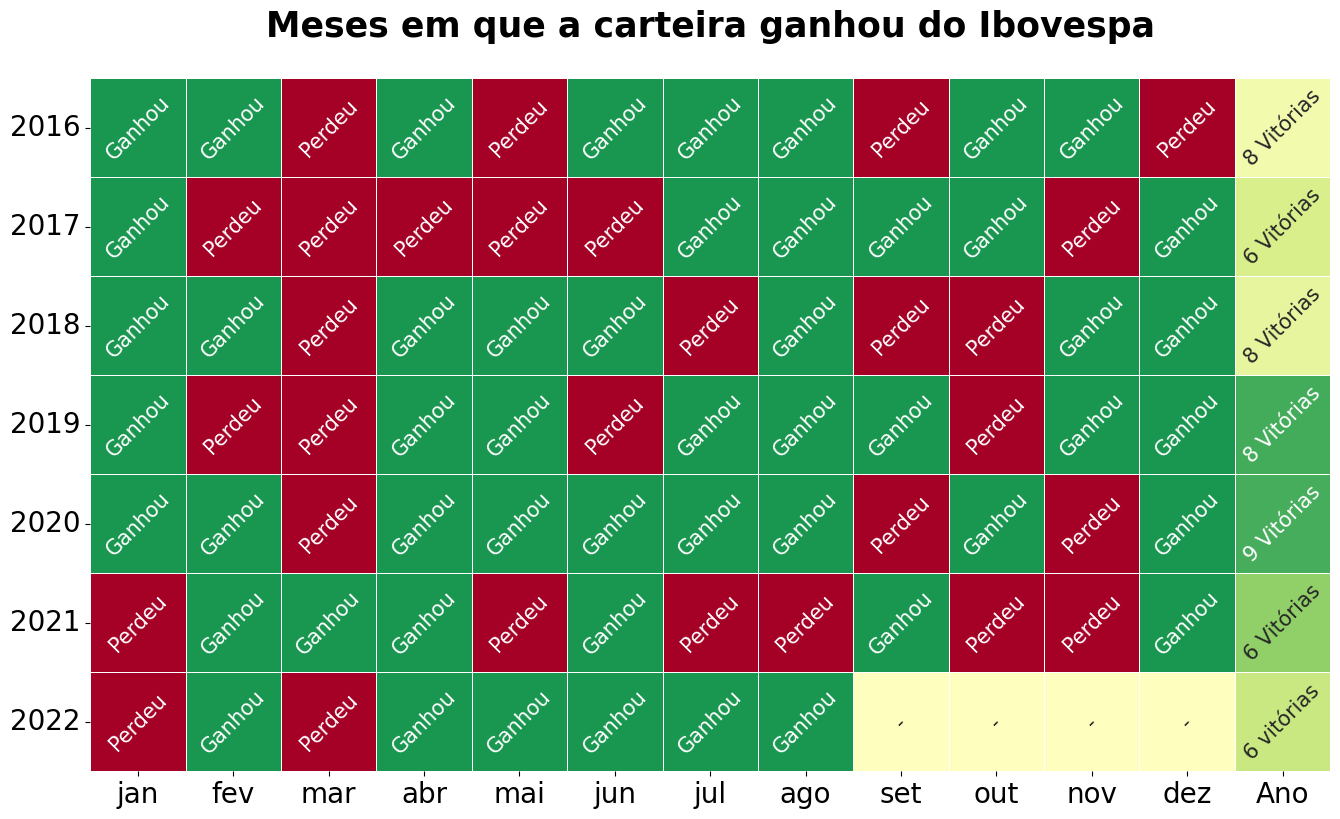

In [144]:
rac = list(resultado_anual['retorno_carteira_anual'])
rai = list(resultado_anual['retorno_ibovespa_anual'])
dra = list(resultado_anual['retorno_carteira_anual'] - resultado_anual['retorno_ibovespa_anual'])
daux = {'ano': ['2016', '2017', '2018', '2019', '2020', '2021', '2022']}  

aux = pd.DataFrame(data=dic_carteira)
aux['diferenca'] = aux['retorno_carteira'] - aux['retorno_ibovespa']

aux['ano'] = lista_anos = [data[4:8] for data in lista_meses]
aux['mes'] = lista_anos = [data[0:3] for data in lista_meses]
anos = ['2016', '2017', '2018', '2019', '2020', '2021', '2022']
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

for mes in meses:
    lista_aux = list(aux.loc[(aux['mes'] == mes)]['retorno_carteira'])
    if len(lista_aux) == 7:
        daux[mes] = lista_aux
    else:
        a = 7 - len(lista_aux)
        for i in range(a):
            lista_aux.append(0)
        daux[mes] = lista_aux
aux2 = pd.DataFrame(data=daux)
aux2.set_index('ano', inplace=True)
aux2['Total'] = rac

# Mapa de calor representando o desempenho da carteira ao longo do período de tempo analisado
plt.figure(figsize=(16,9))

cbar_kws = {'format':lambda x, pos: '{:.0%}'.format(x)}
annot_kws={'fontsize':15}
ax = sns.heatmap(aux2, annot=True, vmin=-0.2, vmax=0.2, linewidths=0.8, fmt=".2%", annot_kws=annot_kws, cmap="RdYlGn", cbar=None, center = 0, robust = True, cbar_kws=cbar_kws)   
plt.title("Retorno da Carteira", fontsize=25, pad=30, weight='bold')
plt.yticks(rotation=0, fontsize=20)
plt.xticks(fontsize=20)
ax.set(xlabel=None,
      ylabel=None)


for mes in meses:
    lista_aux = list(aux.loc[(aux['mes'] == mes)]['retorno_ibovespa'])
    if len(lista_aux) == 7:
        daux[mes] = lista_aux
    else:
        a = 7 - len(lista_aux)
        for i in range(a):
            lista_aux.append(0)
        daux[mes] = lista_aux
        
aux2 = pd.DataFrame(data=daux)
aux2.set_index('ano', inplace=True)
aux2['Total'] = rai

# Mapa de calor representando o desempenho do Ibovespa ao longo do período de tempo analisado
plt.figure(figsize=(16,9))

cbar_kws = {'format':lambda x, pos: '{:.0%}'.format(x)}
annot_kws={'fontsize':15}
ax = sns.heatmap(aux2, annot=True, vmin=-0.2, vmax=0.2, linewidths=0.8, fmt=".2%", annot_kws=annot_kws, cmap="RdYlGn", cbar=None, center = 0, robust = True, cbar_kws=cbar_kws)   
plt.title("Retorno do Ibovespa", fontsize=25, pad=30, weight='bold')
plt.yticks(rotation=0, fontsize=20)
plt.xticks(fontsize=20)
ax.set(xlabel=None,
      ylabel=None)

for mes in meses:
    lista_aux = list(aux.loc[(aux['mes'] == mes)]['diferenca'])
    if len(lista_aux) == 7:
        daux[mes] = lista_aux
    else:
        a = 7 - len(lista_aux)
        for i in range(a):
            lista_aux.append(0)
        daux[mes] = lista_aux

aux2 = pd.DataFrame(data=daux)
aux2.set_index('ano', inplace=True)
aux2['Total'] = dra

# Mapa de calor representando o desempenho da carteira em relação ao Ibovespa ao longo do período de tempo analisado
plt.figure(figsize=(16,9))

cbar_kws = {'format':lambda x, pos: '{:.0%}'.format(x)}
annot_kws={'fontsize':15}
ax = sns.heatmap(aux2, annot=True, vmin=-0.1, vmax=0.1, linewidths=0.8, fmt=".2%", annot_kws=annot_kws, cmap="RdYlGn", cbar=None, center = 0, robust = True, cbar_kws=cbar_kws)   
plt.title("Diferença entre o retorno da carteira e o retorno do Ibovespa", fontsize=25, pad=30, weight='bold')
plt.yticks(rotation=0, fontsize=20)
plt.xticks(fontsize=20)
ax.set(xlabel=None,
      ylabel=None)

# Mapa de calor representando o desempenho da carteira em relação ao Ibovespa ao longo do período de tempo analisado
aux['ganhou'] = (aux['retorno_carteira'] > aux['retorno_ibovespa'])
aux['ganhou'] = aux['ganhou'].astype(int)
k = {}

for mes in meses:
    lista_aux = list(aux.loc[(aux['mes'] == mes)]['ganhou'])
    if len(lista_aux) == 7:
        daux[mes] = lista_aux
    else:
        a = 7 - len(lista_aux)
        for i in range(a):
            lista_aux.append(0.5)
        daux[mes] = lista_aux
aux2 = pd.DataFrame(data=daux)
aux2.set_index('ano', inplace=True)
aux2['Ano'] = (resultado_anual['retorno_carteira_anual'] > resultado_anual['retorno_ibovespa_anual']) 
aux2['Ano'] = aux2['Ano'].astype(int)
aux2['Ano'] = [0.5 + ret for ret in dra]

l2 = []
k['anos'] = anos
for mes in aux2:
    if mes != 'Ano':
        z = list(aux2[mes])
        l = []
        for item in z:
            if item == 1:
                l.append('Ganhou')
            elif item == 0.5:
                l.append('-')
            else:
                l.append('Perdeu')
        k[mes] = l

t = pd.DataFrame(data=k)

for item in aux2.index:
    if list(aux2.loc[item, :][:12])[-1] != 0.5:
        if sum(list(aux2.loc[item, :][:12])):
            l2.append(str(int(sum(list(aux2.loc[item, :][:12])))) + ' Vitórias')
    else:
        soma = 0
        for i in list(aux2.loc[item, :][:12]):
            if i != 0.5:
                soma += i
        l2.append(str(int(soma))  + ' vitórias')

t['Ano'] = l2
t.set_index('anos', inplace=True)

plt.figure(figsize=(16,9))

annot_kws={'fontsize':15, 'rotation':"45"}
ax = sns.heatmap(aux2, fmt='s', vmin=0, vmax=0.9, annot=t, linewidths=0.70, annot_kws=annot_kws, cmap="RdYlGn", cbar=None, center = 0.5, robust = True)   
plt.title("Meses em que a carteira ganhou do Ibovespa", fontsize=25, pad=30, weight='bold')
plt.yticks(rotation=0, fontsize=20)
plt.xticks(fontsize=20)
ax.set(xlabel=None,
      ylabel=None)

C:\Users\Felipe\Anaconda3\lib\site-packages\ipykernel_launcher.py:60: UserWarning:

FixedFormatter should only be used together with FixedLocator



[Text(0, 0.0, '0.00%'),
 Text(0, 1.0, '100.00%'),
 Text(0, 2.0, '200.00%'),
 Text(0, 3.0, '300.00%'),
 Text(0, 4.0, '400.00%'),
 Text(0, 5.0, '500.00%'),
 Text(0, 6.0, '600.00%'),
 Text(0, 7.0, '700.00%')]

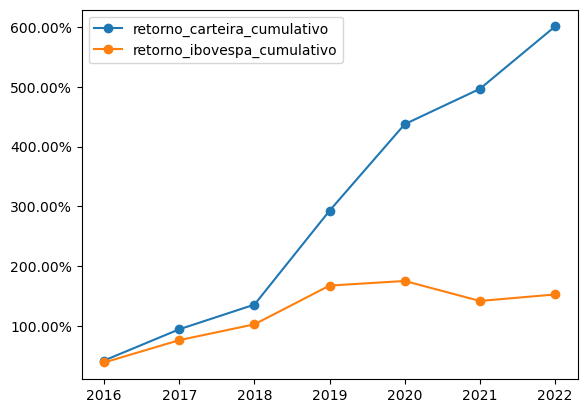

In [138]:
# Comparação entre o retorno da carteira e do Ibovespa ano a ano
gb = resultado_anual.reset_index()

lista_carteira = list(gb['retorno_carteira_anual'])
lista_ibovespa = list(gb['retorno_ibovespa_anual'])
lista_retornos = lista_carteira + lista_ibovespa
lista_ano = list(gb['ano']) * 2
lista_rotulos = ['Carteira'] * 7 + ['Ibovespa'] * 7

dic_aux = {'Ano': lista_ano,'Retorno': lista_retornos,'Legenda': lista_rotulos}
df_aux = pd.DataFrame(data=dic_aux)

fig = px.bar(df_aux, x='Ano', text_auto=True, y='Retorno', 
             color="Legenda", barmode='group', template='seaborn', 
             title="Comparação entre o retorno da carteira e do Ibovespa ano a ano",
             labels={
        'Retorno': '',
        'Ano': ''
})
fig.update_yaxes(patch=dict(
        tickformat='.1%',
    ))
fig.update_layout(title={
    'font_family' : "Arial Black",
})
fig.show()

# Comparação entre o retorno acumulado da carteira e do Ibovespa  - gráfico de barras
gb = resultado_anual_cumulativo.reset_index()

lista_carteira = list(gb['retorno_carteira_cumulativo'])
lista_ibovespa = list(gb['retorno_ibovespa_cumulativo'])
lista_retornos = lista_carteira + lista_ibovespa
lista_ano = list(gb['ano']) * 2
lista_rotulos = ['Carteira'] * 7 + ['Ibovespa'] * 7

dic_aux = {'Ano': lista_ano,'Retorno': lista_retornos,'Legenda': lista_rotulos}
df_aux = pd.DataFrame(data=dic_aux)

fig = px.bar(df_aux, x='Ano', text_auto=True, y='Retorno', 
             color="Legenda", barmode='group', template='seaborn', 
             title="Comparação entre o retorno acumulado da carteira e do Ibovespa",
             labels={
        'Retorno': '',
        'Ano': ''
})
fig.update_yaxes(patch=dict(
        tickformat='.1%',
    ))
fig.update_layout(title={
    'font_family' : "Arial Black",
})
fig.show()

# Comparação entre o retorno acumulado da carteira e do Ibovespa - gráfico de linhas
import matplotlib.ticker as mtick

ax = resultado_anual_cumulativo.plot(marker='o', xlabel='')
vals = ax.get_yticks()
ax.set_yticklabels(['{:,.2%}'.format(x) for x in vals])